#Part I: Unsupervised Learning

In [150]:
# Import drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
# importing the dataset

import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Imarticus Datasets/Paper2/credit_card.csv')

Q1. The primary analysis of several categorical
features.

In [152]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [154]:
df.shape

(8950, 18)

In [155]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [156]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [157]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


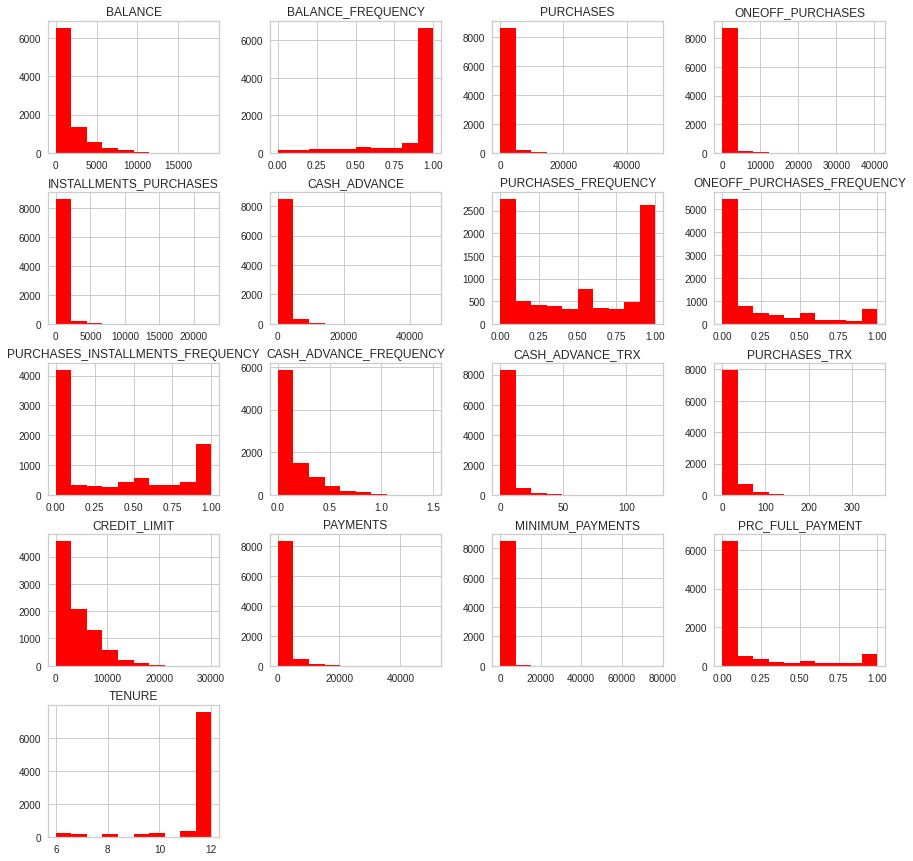

In [158]:
# histogram

import matplotlib.pyplot as plt

fig=df.hist(figsize=(15,15),color='red')
plt.show()

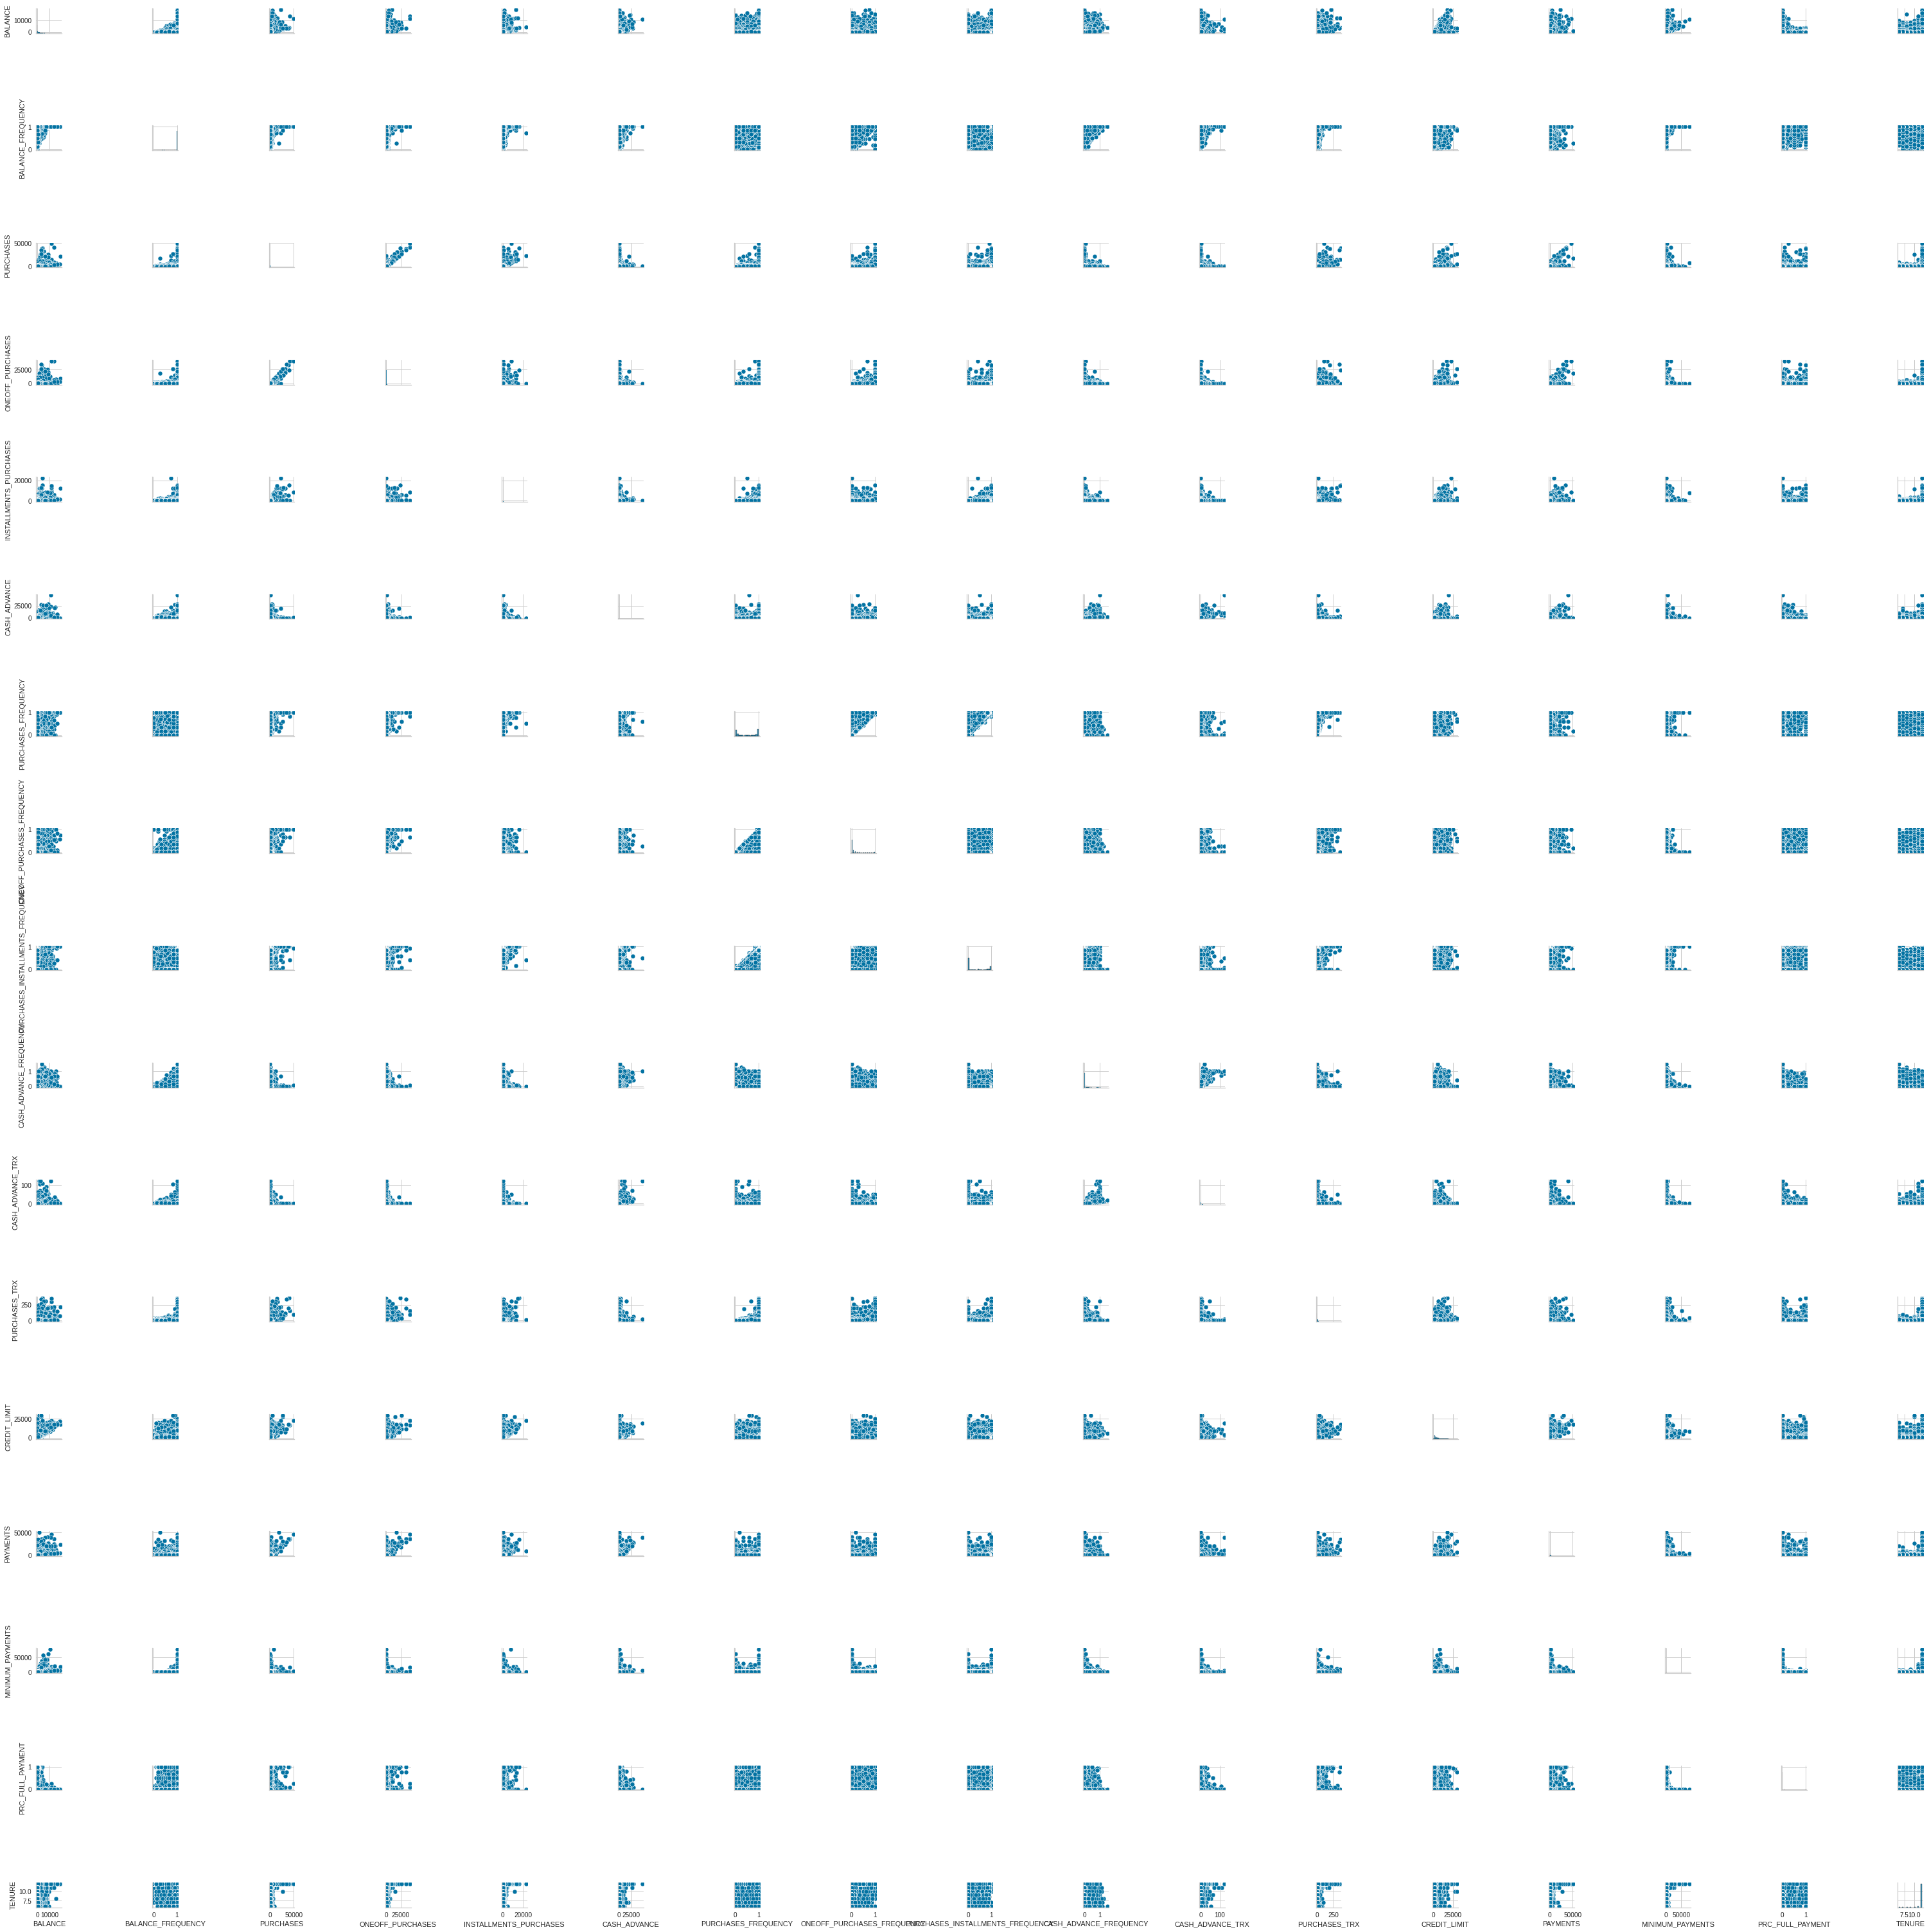

In [159]:
# pair plot

import seaborn as sns

sns.pairplot(df)

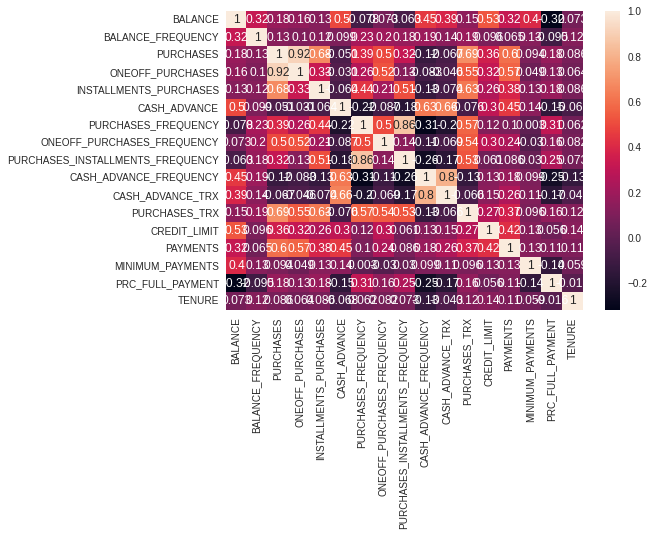

In [160]:
# Heatmap

sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()

Q2. Perform the following Exploratory Data Analysis tasks:

a. Missing Value Analysis

b. Outlier Treatment using the Z-score method

c. Deal with correlated variables


a. Missing Value Analysis

In [161]:
# cheaking for missing values

df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [162]:
# filling missing values

df.MINIMUM_PAYMENTS.fillna(0,inplace=True)
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mode()[0],inplace=True)

In [163]:
# cheaking for missing values

df.isna().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [164]:
# dropping cust_id

df=df.drop(['CUST_ID'],axis=1)

In [165]:
df.shape

(8950, 17)

In [166]:
# remove duplicates
df=df.drop_duplicates()

In [167]:
df.shape

(8950, 17)

b. Outlier Treatment using the Z-score method

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [169]:
# getting columns

import numpy
col=df.columns.values

In [170]:
# IQR method (Inter Quantile Range Method)

p0=[]
p100=[]
iqr=[]

q1=[]
q2=[]
q3=[]


for i in col:

  if type(df[i][0]) in [numpy.float64,numpy.int64] :
    
    p0.append(df[i].min())

    p100.append(df[i].max())

    x=df[i].quantile(0.25)                   # 25th quantile

    y= df[i].quantile(0.50)                    # 50th quantile

    z= df[i].quantile(0.75)                    # 75th quantile
    
    q1.append(x)
    q2.append(y)
    q3.append(z)
    
    iqr.append(z-x)                            # Inter Quantile Range
  else:
    p0.append(None)

    p100.append(None)

    iqr.append(None)

    q1.append(None)
    q2.append(None)
    q3.append(None)

In [171]:
n=len(col)-1
for i in range(0,n):
  print(p0[i],'\t',p100[i],'\t',iqr[i])

0.0 	 19043.13856 	 1925.85812
0.0 	 1.0 	 0.11111099999999996
0.0 	 49039.57 	 1070.4950000000001
0.0 	 40761.25 	 577.405
0.0 	 22500.0 	 468.6375
0.0 	 47137.21176 	 1113.8211392500002
0.0 	 1.0 	 0.833334
0.0 	 1.0 	 0.3
0.0 	 1.0 	 0.75
0.0 	 1.5 	 0.222222
0 	 123 	 4.0
0 	 358 	 16.0
50.0 	 30000.0 	 4900.0
0.0 	 50721.48336 	 1517.8581507500003
0.0 	 76406.20752 	 625.685337
0.0 	 1.0 	 0.142857


In [172]:
lower_cutoff=[]
upper_cutoff=[]
i=0
for i in range(0,n):
  if (iqr[i]!=None) and (q1[i]!=None) and (q3[i]!=None):
    lower_cutoff.append(q1[i]- 1.5*iqr[i])
    upper_cutoff.append(q3[i]+ 1.5*iqr[i])
  else:
    lower_cutoff.append(None)
    upper_cutoff.append(None)
              

In [173]:
lower_cutoff

[-2760.5052645,
 0.7222225000000001,
 -1566.1075000000003,
 -866.1075,
 -702.95625,
 -1670.7317088750003,
 -1.166668,
 -0.44999999999999996,
 -1.125,
 -0.333333,
 -6.0,
 -23.0,
 -5750.0,
 -1893.5110601250003,
 -775.4998417500001,
 -0.21428550000000002]

In [174]:
upper_cutoff 

[4942.9272155,
 1.1666664999999998,
 2715.8725000000004,
 1443.5124999999998,
 1171.59375,
 2784.5528481250003,
 2.166668,
 0.75,
 1.875,
 0.555555,
 10.0,
 41.0,
 13850.0,
 4177.921542875,
 1727.24150625,
 0.35714250000000003]

In [175]:
# clipping the outliers

# if the lower_cutoff < p0 -> There are no outliers on the lower side
# if the upper_cutoff > p100 -> There are no outliers on the higher side

i=0

for i in range(0,n):
    df[col[i]].clip(upper=upper_cutoff[i],inplace=True)
    df[col[i]].clip(lower=lower_cutoff[i],inplace=True)

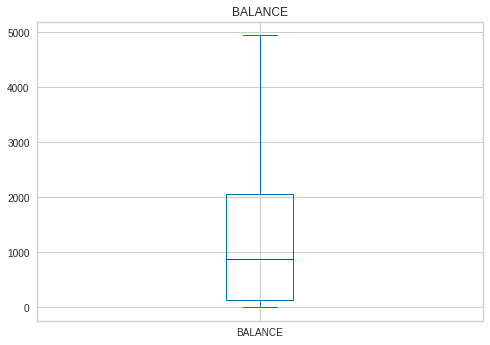

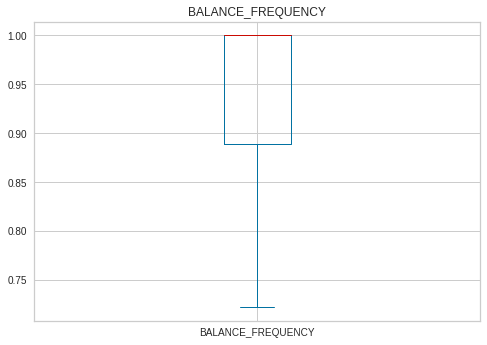

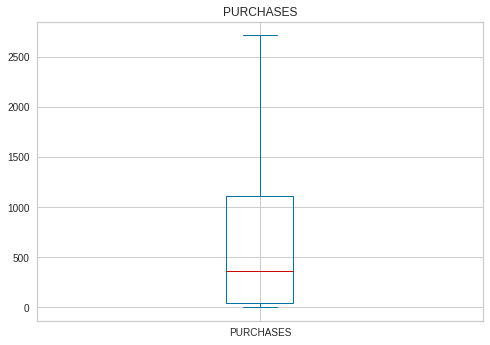

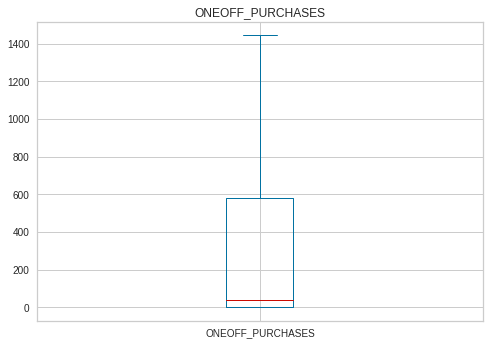

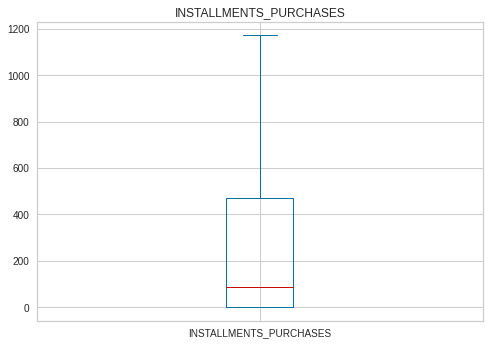

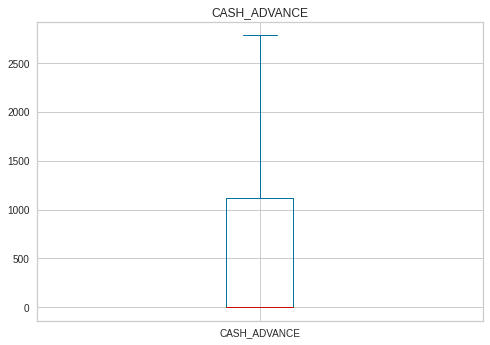

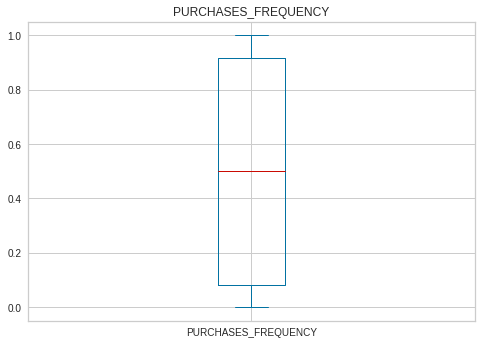

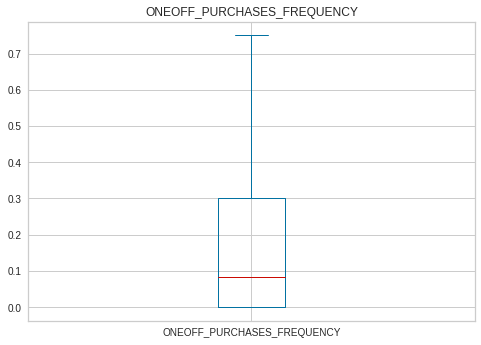

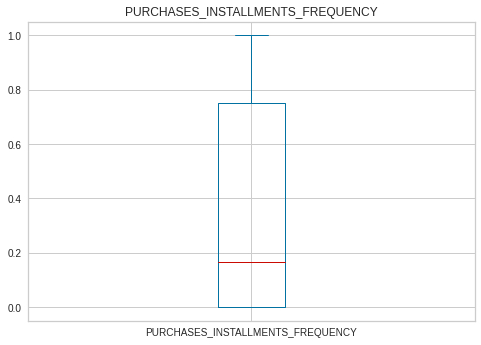

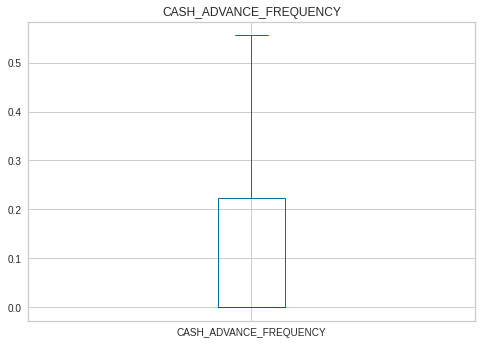

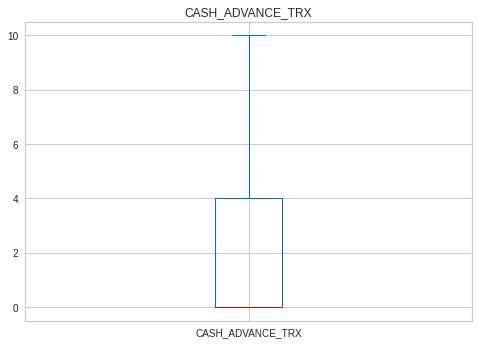

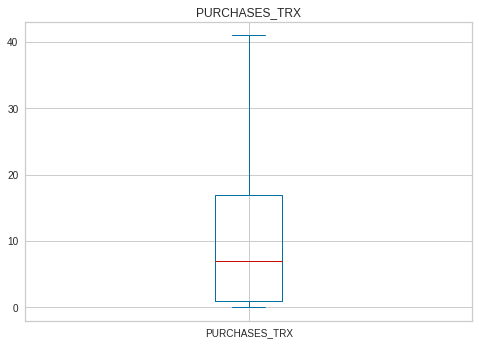

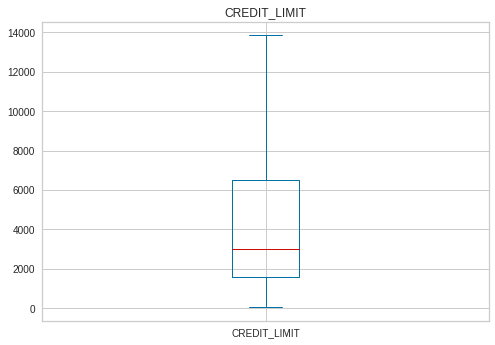

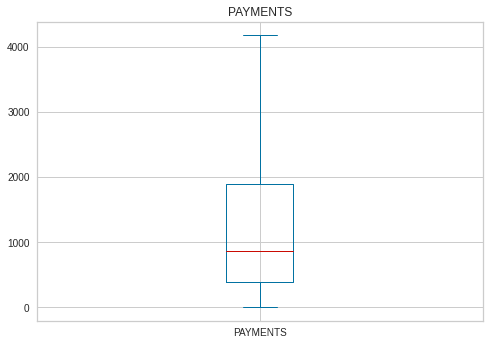

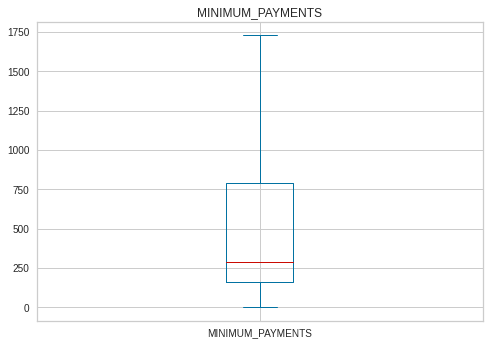

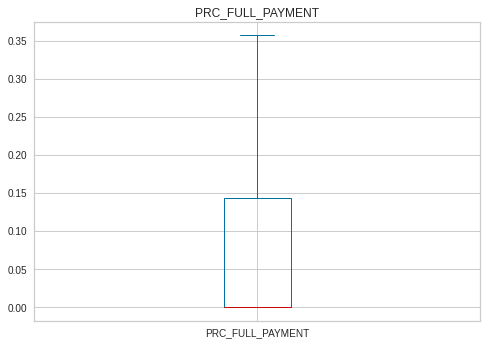

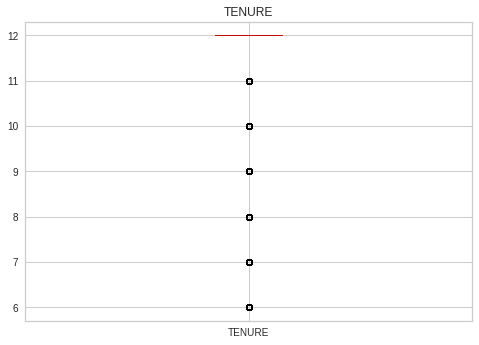

In [176]:
# boxplot after cliping

for i in col:
  df[i].plot(title=i,kind='box')
  plt.show()

c. Deal with correlated variables

In [177]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.403457,0.095805,0.124043,0.009457,0.557393,-0.108922,0.081477,-0.096473,0.497089,0.500925,0.057123,0.488555,0.350558,0.831727,-0.419972,0.075417
BALANCE_FREQUENCY,0.403457,1.000000,0.184972,0.149539,0.161057,0.102849,0.222217,0.199187,0.180675,0.186646,0.175467,0.248062,0.108060,0.133318,0.374086,-0.183459,0.186697
PURCHASES,0.095805,0.184972,1.000000,0.830603,0.706135,-0.177093,0.631891,0.683525,0.488919,-0.207612,-0.190023,0.808546,0.330448,0.501153,0.090746,0.212936,0.120207
ONEOFF_PURCHASES,0.124043,0.149539,0.830603,1.000000,0.286764,-0.116870,0.408137,0.821933,0.152872,-0.127137,-0.117956,0.622341,0.321507,0.422124,0.061561,0.091038,0.087002
INSTALLMENTS_PURCHASES,0.009457,0.161057,0.706135,0.286764,1.000000,-0.185467,0.688315,0.249382,0.780193,-0.220042,-0.200208,0.725475,0.191961,0.324137,0.068641,0.254259,0.111298
CASH_ADVANCE,0.557393,0.102849,-0.177093,-0.116870,-0.185467,1.000000,-0.319499,-0.134830,-0.264589,0.769767,0.801425,-0.203801,0.258440,0.331303,0.433981,-0.227197,-0.099027
PURCHASES_FREQUENCY,-0.108922,0.222217,0.631891,0.408137,0.688315,-0.319499,1.000000,0.499498,0.862934,-0.336823,-0.315382,0.795194,0.118251,0.163930,-0.035872,0.316356,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.081477,0.199187,0.683525,0.821933,0.249382,-0.134830,0.499498,1.000000,0.143475,-0.121845,-0.118664,0.650300,0.293041,0.336919,0.027119,0.123273,0.077257
PURCHASES_INSTALLMENTS_FREQUENCY,-0.096473,0.180675,0.488919,0.152872,0.780193,-0.264589,0.862934,0.143475,1.000000,-0.285161,-0.264110,0.700146,0.057795,0.120975,-0.012150,0.266671,0.073275
CASH_ADVANCE_FREQUENCY,0.497089,0.186646,-0.207612,-0.127137,-0.220042,0.769767,-0.336823,-0.121845,-0.285161,1.000000,0.930204,-0.217631,0.128296,0.213939,0.383204,-0.268737,-0.127145


Q3. Perform dimensionality reduction using PCA such that the
95% of the variance is explained

In [181]:
# PCA - Principal Compound Analysis
x=df.drop(['TENURE'],axis=1)
y=df['TENURE']
print(x)
print(y)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40            0.0000   
1     3202.467416           0.909091       0.00            0.0000   
2     2495.148862           1.000000     773.17          773.1700   
3     1666.670542           0.722223    1499.00         1443.5125   
4      817.714335           1.000000      16.00           16.0000   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12            0.0000   
8946    19.183215           1.000000     300.00            0.0000   
8947    23.398673           0.833333     144.40            0.0000   
8948    13.457564           0.833333       0.00            0.0000   
8949   372.708075           0.722223    1093.25         1093.2500   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   2784.5

In [182]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.60,test_size=0.40,random_state=47)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape


((5370, 16), (3580, 16), (5370,), (3580,))

In [183]:
# classification

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()


In [184]:
model.fit(xtrain,ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [185]:
predicted_y=model.predict(xtest)

predicted_y

array([12, 12, 12, ..., 12, 12, 12])

In [186]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(ytest,predicted_y)

0.8444134078212291

In [188]:
#making confusion matrix
confusion_matrix(ytest,predicted_y)

array([[   6,    9,    0,    0,    0,    0,   54],
       [   2,    5,    0,    1,    0,    0,   59],
       [   1,    6,    0,    0,    0,    0,   81],
       [   1,    3,    0,    0,    0,    0,   76],
       [   0,    1,    0,    0,    0,    0,   82],
       [   0,    2,    0,    0,    0,    0,  152],
       [  19,    6,    0,    1,    1,    0, 3012]])

In [187]:
#classification report
z=classification_report(ytest,predicted_y)
print(z) 

              precision    recall  f1-score   support

           6       0.21      0.09      0.12        69
           7       0.16      0.07      0.10        67
           8       0.00      0.00      0.00        88
           9       0.00      0.00      0.00        80
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00       154
          12       0.86      0.99      0.92      3039

    accuracy                           0.84      3580
   macro avg       0.17      0.16      0.16      3580
weighted avg       0.73      0.84      0.78      3580



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
#PCA

from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)

In [190]:
pca.fit(xtrain)

PCA(n_components=0.95)

In [191]:
xtrain_transformed=pca.transform(xtrain)

print(xtrain_transformed.shape)

(5370, 4)


In [192]:
xtest_transformed=pca.transform(xtest)

print(xtest_transformed.shape)


(3580, 4)


In [193]:
new_model=LogisticRegression(penalty='l1',solver='liblinear')


In [194]:

new_model.fit(xtrain_transformed,ytrain)


LogisticRegression(penalty='l1', solver='liblinear')

In [195]:

new_predicition=new_model.predict(xtest_transformed)

In [197]:
ytest,predicted_y,new_predicition

(6492    12
 4006    12
 1439    12
 5898     6
 1031    12
         ..
 4920    12
 571     12
 4637    12
 8506     9
 2805    12
 Name: TENURE, Length: 3580, dtype: int64,
 array([12, 12, 12, ..., 12, 12, 12]),
 array([12, 12, 12, ..., 12, 12, 12]))

In [198]:
# accuracy 

from sklearn.metrics import accuracy_score

new_acc=accuracy_score(new_predicition,ytest)

In [199]:
new_acc

0.8488826815642458

Q4. Find the optimum value of k for k-means clustering using
the elbow method. Plot the elbow curve


In [200]:
from sklearn.cluster import KMeans

wcss=[]  #With in cluster sum of squares

for i in range(1,8):
  kmeans=KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001,  
                verbose=0, 
                random_state=None, 
                copy_x=True,  
                algorithm='auto')
  
  kmeans.fit(df)

  wcss.append(kmeans.inertia_)  

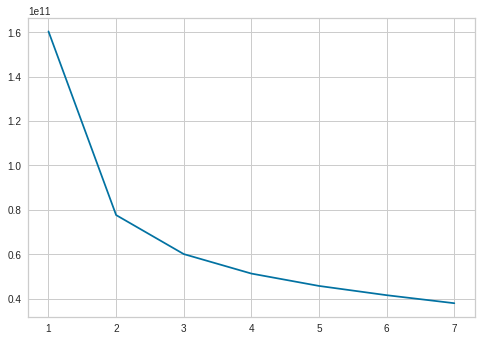

In [201]:
import matplotlib.pyplot as plt

plt.plot(range(1,8),wcss)  #Elbow Graph

Q5. Find the optimum value of k for k-means clustering using
the silhouette score method and specify the number of
observations in each cluster using a bar plot

In [202]:
import sklearn.metrics as metrics


Silhouette score for k(clusters) = 3 is 0.37686633115523693
Silhouette score for k(clusters) = 4 is 0.3873033117745804
Silhouette score for k(clusters) = 5 is 0.28850422322756936
Silhouette score for k(clusters) = 6 is 0.2726865727342347
Silhouette score for k(clusters) = 7 is 0.263346248327521
Silhouette score for k(clusters) = 8 is 0.2608552343662599
Silhouette score for k(clusters) = 9 is 0.26966551539837064


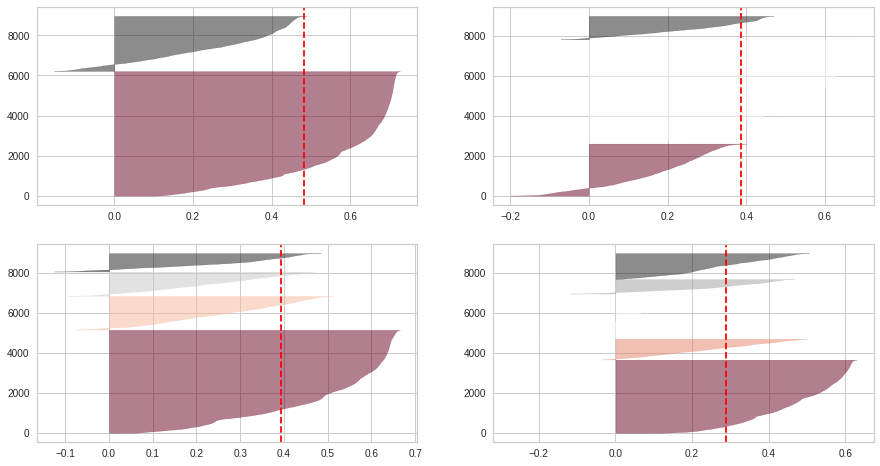

In [205]:
for i in range(3,10):
    kmeans=KMeans(n_clusters=i,
                  init="k-means++",
                  random_state=200)
    kmeans.fit(df)
    labels=kmeans.labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,
                                         labels,
                                         metric="euclidean",
                                         sample_size=1000,
                                         random_state=200)))
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='RdGy', ax=ax[q-1][mod])
    visualizer.fit(x)

#Part II: Deep Learning 

In [236]:
# importing the dataset

d=pd.read_csv('/content/drive/MyDrive/Imarticus Datasets/Paper2/Sentiment.csv')

In [237]:
d

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [238]:
d.shape

(13871, 21)

In [239]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [241]:
d=d.drop_duplicates()

In [243]:
d.shape

(13871, 21)

Q1. Print the total number of positive and negative sentiments.

In [242]:
c1=0
c2=0
for i in d['sentiment']:
  if i=='Positive':
    c1=c1+1
  elif i=='Negative':
    c2=c2+1
print('Total no. of Positive sentiments :',c1)
print('Total no. of Negative sentiments :',c2)


Total no. of Positive sentiments : 2236
Total no. of Negative sentiments : 8493


Q2. Build a sequential LSTM model to predict positive and
negative sentiments.

In [244]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [245]:
corpus=[]
for i in range(0, 13871):
    review = re.sub('[^a-zA-Z]', ' ', 
                    d['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [246]:
corpus 

['rt nancyleegrahn everyon feel climat chang question last night exactli gopdeb',
 'rt scottwalk catch full gopdeb last night scott best line second walker http co zsff',
 'rt tjmshow mention tamir rice gopdeb held cleveland wow',
 'rt robgeorg carli fiorina trend hour debat men complet gopdeb say',
 'rt danscavino gopdeb w realdonaldtrump deliv highest rate histori presidenti debat trump http co',
 'rt gregabbott tx tedcruz first day rescind everi illeg execut action taken barack obama gopdeb foxnew',
 'rt warriorwoman like happi heard go moder anymor gopdeb megynkelli http',
 'go msnbc live thomasarobert around pm et gopdeb',
 'deer headlight rt lizzwinstead ben carson may brain surgeon perform lobotomi gopdeb',
 'rt nancyosborn last night debat prove gopdeb batsask badassteachersa tbat http co g ggji bjd',
 'jgreendc realdonaldtrump fair billclinton own phrase gopdeb',
 'rt waynedupreeshow woke tweet gopdeb best line night via govmikehuckabe http co ov hxhicv',
 'read famili comment

In [248]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [250]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(d['text'])
y = d['sentiment']

In [251]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

In [254]:
model = Sequential()

Q3.
Based on the model, check the sentiment for the following
two sentences

a. 'He is a great leader.'

b. 'He is a terrible leader.'


In [ ]:
s1='he is a great leader'
s2='he is a terrible leader'